Importing Libraries


In [ ]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

Loading the Zinc Dataset


In [ ]:
file_path = "Zinc Historical Data.csv"
zinc_data = pd.read_csv(file_path)
zinc_data

,Date,Price,Open,High,Low,Vol.,Change %
0,30-08-2024,275.00,275.00,275.40,275.00,0.00K,2.38%
1,29-08-2024,268.60,268.60,271.35,265.30,0.02K,0.00%
2,28-08-2024,268.60,271.50,271.50,268.10,0.04K,-0.76%
3,27-08-2024,270.65,268.90,272.35,268.90,0.03K,0.52%
4,26-08-2024,269.25,268.55,269.90,266.50,0.34K,0.75%
...,...,...,...,...,...,...,...
2753,06-01-2014,127.75,127.40,127.85,125.90,7.52K,0.63%
2754,04-01-2014,126.95,126.95,126.95,126.95,NaN,0.00%
2755,03-01-2014,126.95,129.25,129.25,126.80,7.66K,-2.08%
2756,02-01-2014,129.65,128.60,131.05,128.60,11.77K,1.69%


In [ ]:
# @title Data Cleaning
# Step 1: Inspect the dataset
print("Initial Data Preview:\n", zinc_data.head())
print("\nData Summary:\n", zinc_data.info())

# Step 2: Handle missing values
# Check for missing values
print("\nMissing Values:\n", zinc_data.isnull().sum())

# Drop rows with missing 'Date' or 'Price' values (critical columns)
zinc_data.dropna(subset=['Date', 'Price'], inplace=True)

# Optionally, fill other missing values (e.g., 'Volume') with a default or interpolated value
zinc_data['Vol.'].fillna(method='ffill', inplace=True)  # Forward fill example

# Step 3: Ensure correct data types
zinc_data['Date'] = pd.to_datetime(zinc_data['Date'], errors='coerce')  # Ensure 'Date' is in datetime format
# Check if 'Price' column is of type object (string) before applying str.replace
if zinc_data['Price'].dtype == 'object':
    zinc_data['Price'] = pd.to_numeric(zinc_data['Price'].str.replace(',', ''), errors='coerce')  # Convert 'Price' to numeric if it's a string
else:
    zinc_data['Price'] = pd.to_numeric(zinc_data['Price'], errors='coerce')  # Convert 'Price' to numeric directly if it's not a string

# Step 4: Remove invalid or inconsistent data
zinc_data = zinc_data[zinc_data['Price'] > 0]  # Remove rows where 'Price' is non-positive or NaN

# Step 5: Handle duplicates
zinc_data.drop_duplicates(subset=['Date'], inplace=True)  # Drop duplicate dates, keeping the first occurrence

# Step 6: Sort data by date
zinc_data.sort_values(by='Date', inplace=True)

# Step 7: Standardize column names (optional but recommended)
zinc_data.columns = zinc_data.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 8: Save the cleaned dataset
zinc_data.to_csv('Zinc_Cleaned_Data.csv', index=False)
print("\nCleaned Data Saved Successfully!")


Initial Data Preview:
          Date   Price    Open    High    Low   Vol. Change %
0  30-08-2024  275.00  275.00  275.40  275.0  0.00K    2.38%
1  29-08-2024  268.60  268.60  271.35  265.3  0.02K    0.00%
2  28-08-2024  268.60  271.50  271.50  268.1  0.04K   -0.76%
3  27-08-2024  270.65  268.90  272.35  268.9  0.03K    0.52%
4  26-08-2024  269.25  268.55  269.90  266.5  0.34K    0.75%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2758 non-null   object 
 1   Price     2758 non-null   float64
 2   Open      2758 non-null   float64
 3   High      2758 non-null   float64
 4   Low       2758 non-null   float64
 5   Vol.      2739 non-null   object 
 6   Change %  2758 non-null   object 
dtypes: float64(4), object(3)
memory usage: 151.0+ KB

Data Summary:
 None

Missing Values:
 Date         0
Price        0
Open         0
High         0
L

<ipython-input-3-8cd1db108503>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zinc_data['Vol.'].fillna(method='ffill', inplace=True)  # Forward fill example
<ipython-input-3-8cd1db108503>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  zinc_data['Vol.'].fillna(method='ffill', inplace=True)  # Forward fill example
<ipython-input-3-8cd1db108503>:17: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was spec

In [ ]:
# @title Data Processing
import numpy as np

# Load the cleaned Zinc dataset
file_path = "Zinc_Cleaned_Data.csv"
zinc_data = pd.read_csv(file_path)

# Step 1: Inspect data
print("Data Overview:\n", zinc_data.head())
print("\nData Types:\n", zinc_data.dtypes)

# Step 2: Feature Engineering
# Extract year, month, and day for time-based analysis
zinc_data['Date'] = pd.to_datetime(zinc_data['date'])
zinc_data['Year'] = zinc_data['Date'].dt.year
zinc_data['Month'] = zinc_data['Date'].dt.month
zinc_data['Day'] = zinc_data['Date'].dt.day

# Step 3: Calculate Moving Averages
zinc_data['7-Day_MA'] = zinc_data['price'].rolling(window=7).mean()
zinc_data['30-Day_MA'] = zinc_data['price'].rolling(window=30).mean()

# Step 4: Add Daily Returns
zinc_data['Daily_Return'] = zinc_data['price'].pct_change()

# Step 5: Handle Outliers
# Replace extreme outliers in 'price' with the median value
Q1 = zinc_data['price'].quantile(0.25)
Q3 = zinc_data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

zinc_data['price'] = np.where(
    (zinc_data['price'] < lower_bound) | (zinc_data['price'] > upper_bound),
    zinc_data['price'].median(),
    zinc_data['price']
)

# Step 6: Group and Aggregate Data (Monthly or Yearly)
monthly_data = zinc_data.resample('M', on='Date').agg({
    'price': 'mean',
    'Daily_Return': 'sum',
    '7-Day_MA': 'last'
}).reset_index()

# Step 7: Normalize or Scale Data (Optional - for machine learning prep)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
zinc_data[['price', '7-Day_MA', '30-Day_MA']] = scaler.fit_transform(zinc_data[['price', '7-Day_MA', '30-Day_MA']])

# Step 8: Save the processed data
zinc_data.to_csv('Zinc_Processed_Data.csv', index=False)
monthly_data.to_csv('Zinc_Monthly_Data.csv', index=False)

print("\nProcessed Data Saved Successfully!")




Data Overview:
          date   price    open    high     low    vol. change_%
0  2014-01-01  127.50  127.35  128.00  127.00   1.70K   -1.28%
1  2014-01-02  129.65  128.60  131.05  128.60  11.77K    1.69%
2  2014-01-03  126.95  129.25  129.25  126.80   7.66K   -2.08%
3  2014-01-04  126.95  126.95  126.95  126.95   7.52K    0.00%
4  2014-01-06  127.75  127.40  127.85  125.90   7.52K    0.63%

Data Types:
 date         object
price       float64
open        float64
high        float64
low         float64
vol.         object
change_%     object
dtype: object

Processed Data Saved Successfully!


<ipython-input-8-f7947ac923fa>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = zinc_data.resample('M', on='Date').agg({


In [ ]:
  # @title To get a concise summary of the dataframe
zinc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2758 non-null   object        
 1   price         2758 non-null   float64       
 2   open          2758 non-null   float64       
 3   high          2758 non-null   float64       
 4   low           2758 non-null   float64       
 5   vol.          2758 non-null   object        
 6   change_%      2758 non-null   object        
 7   Date          2758 non-null   datetime64[ns]
 8   Year          2758 non-null   int32         
 9   Month         2758 non-null   int32         
 10  Day           2758 non-null   int32         
 11  7-Day_MA      2752 non-null   float64       
 12  30-Day_MA     2729 non-null   float64       
 13  Daily_Return  2757 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(3), object(3)
memory usage: 269.5+ KB


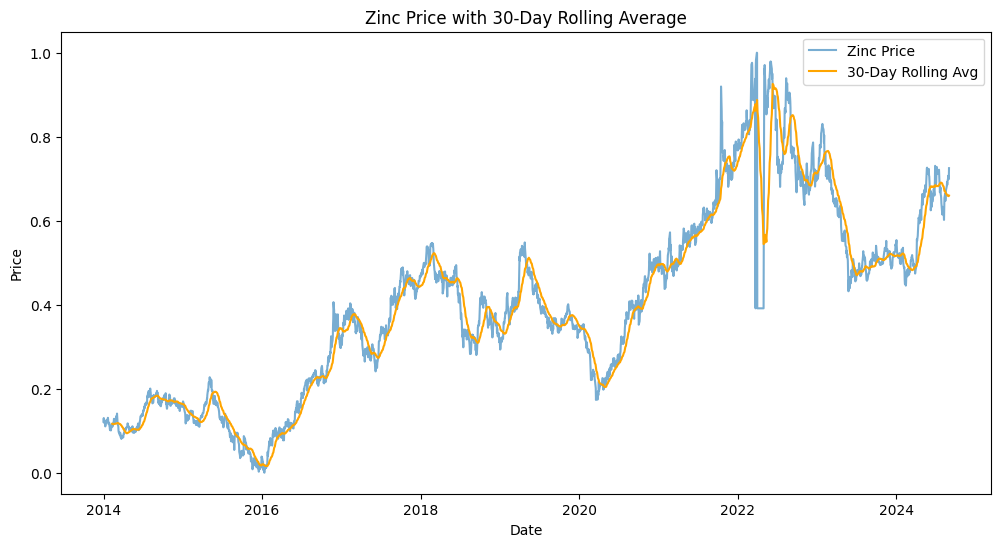

In [ ]:
# @title Time Series Plot with Rolling Average
import matplotlib.pyplot as plt
import pandas as pd

# Calculate 30-day rolling average
zinc_data['30-Day MA'] = zinc_data['price'].rolling(window=30).mean()

# Plot raw prices and rolling average
plt.figure(figsize=(12, 6))
plt.plot(zinc_data['Date'], zinc_data['price'], label='Zinc Price', alpha=0.6)
plt.plot(zinc_data['Date'], zinc_data['30-Day MA'], label='30-Day Rolling Avg', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Zinc Price with 30-Day Rolling Average')
plt.legend()
plt.show()


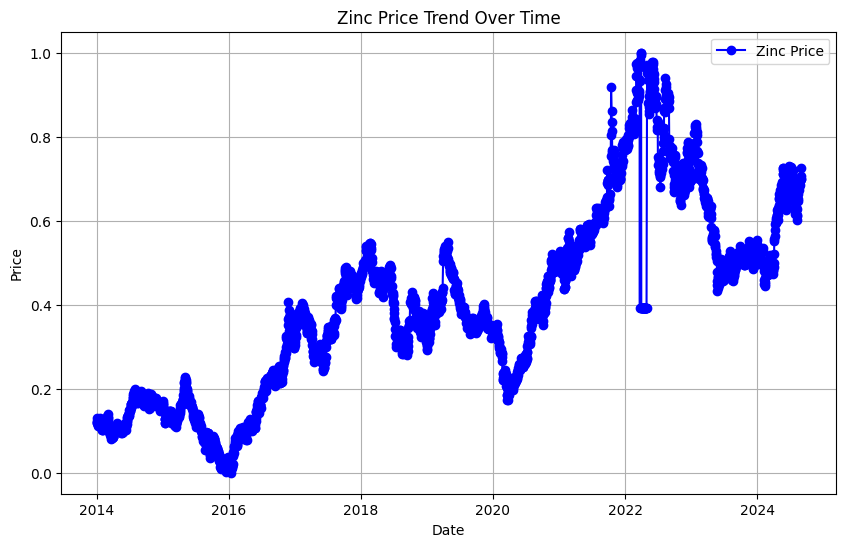

In [ ]:
# @title Zinc Price over time
plt.figure(figsize=(10, 6))
plt.plot(zinc_data['Date'], zinc_data['price'], label='Zinc Price', color='blue', marker='o')
plt.title('Zinc Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


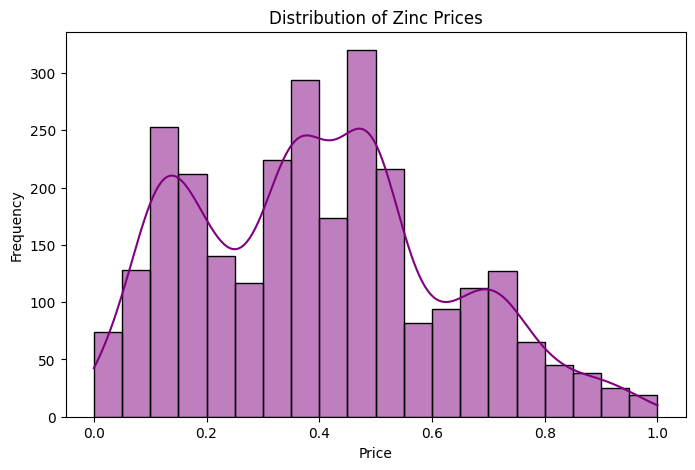

In [ ]:
# @title Distribution of zinc prices
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(zinc_data['price'], bins=20, kde=True, color='purple')
plt.title('Distribution of Zinc Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


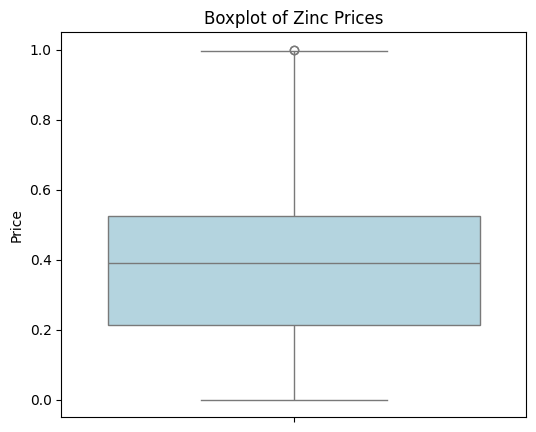

In [ ]:
# @title Box plot for Zinc Price


plt.figure(figsize=(6, 5))
sns.boxplot(y=zinc_data['price'], color='lightblue')
plt.title('Boxplot of Zinc Prices')
plt.ylabel('Price')
plt.show()


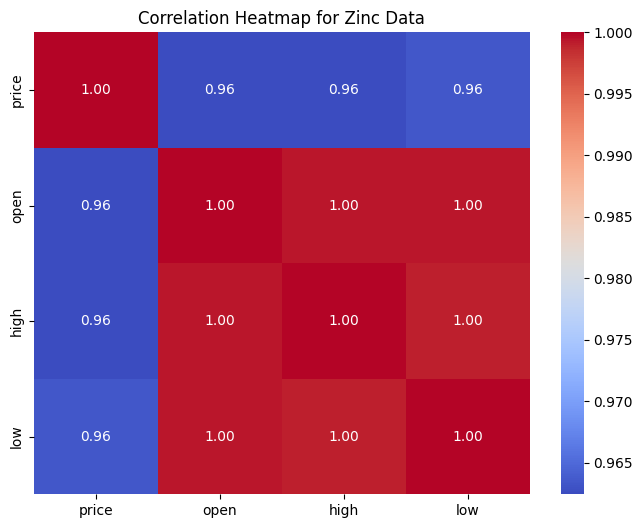

In [ ]:
# @title Correlation Heatmap For Zinc Data
zinc_data['Date'] = pd.to_datetime(zinc_data['Date'], dayfirst=True, errors='coerce')

# Select relevant numeric columns for correlation analysis
correlation_matrix = zinc_data[['price', 'open', 'high', 'low']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Zinc Data')
plt.show()


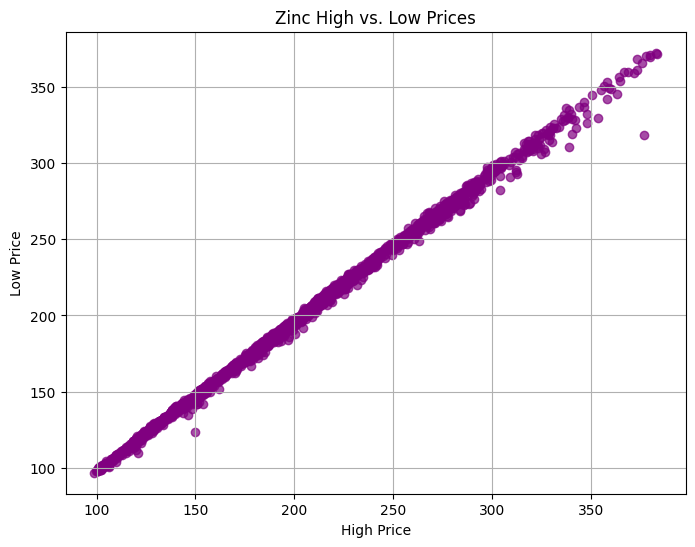

In [ ]:
# @title High vs Low

plt.figure(figsize=(8, 6))
plt.scatter(zinc_data['high'], zinc_data['low'], color='purple', alpha=0.7)
plt.title('Zinc High vs. Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()


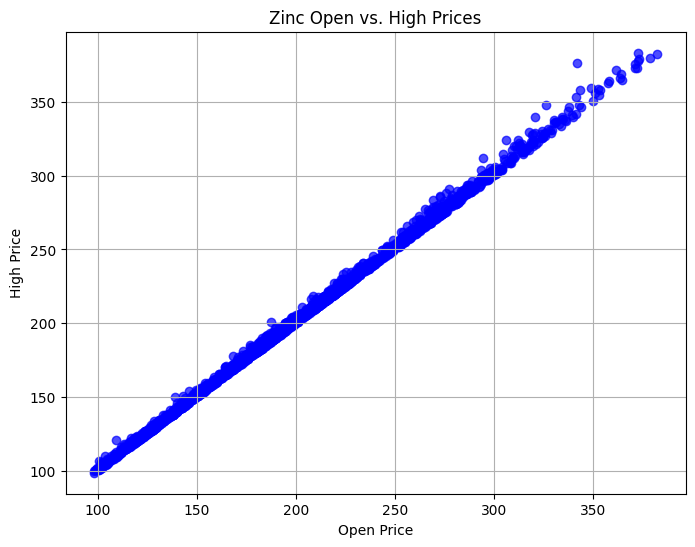

In [ ]:
# @title Open vs High

plt.figure(figsize=(8, 6))
plt.scatter(zinc_data['open'], zinc_data['high'], color='blue', alpha=0.7)
plt.title('Zinc Open vs. High Prices')
plt.xlabel('Open Price')
plt.ylabel('High Price')
plt.grid(True)
plt.show()


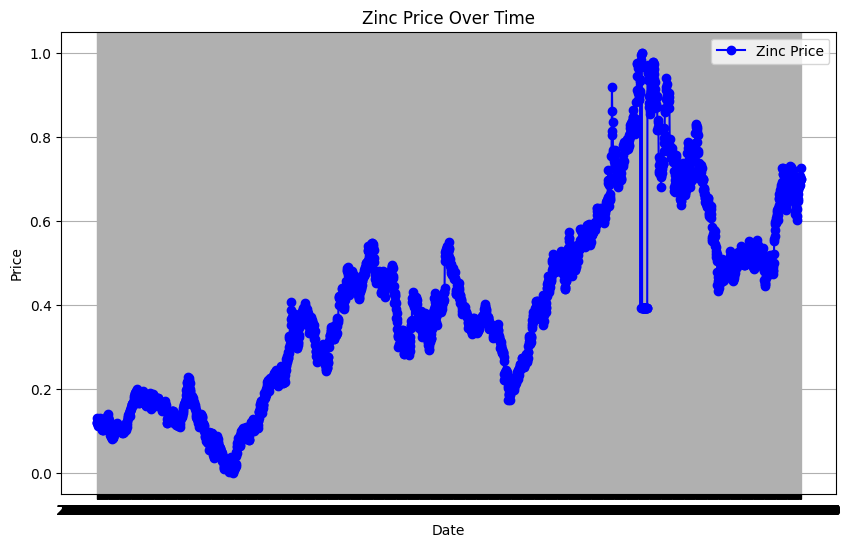

In [ ]:
# @title Date vs Price
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format
zinc_data['Date'] = pd.to_datetime(zinc_data['Date'])

# Plotting Date vs Price
plt.figure(figsize=(10, 6))
plt.plot(zinc_data['date'], zinc_data['price'], label='Zinc Price', color='blue', marker='o')
plt.title('Zinc Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import requests

api_key = "1495790e7b784bafb05c7a66d8e33341"
url = "https://newsapi.org/v2/everything"
params = {
    "q": "zinc ",
    "sortBy": "relevance",
    "language": "en",
    "apiKey": api_key
}

# Make API request
response = requests.get(url, params=params)
data = response.json()

# Extract and display news headlines
for article in data.get("articles", []):
    print(f"Date: {article['publishedAt']}, Headline: {article['title']}")


Date: 2024-11-03T13:00:00Z, Headline: Unbound Flick Review: A Ring Vibrator
Date: 2024-11-06T03:00:22Z, Headline: Zinc Creep and Electroplasticity: Why Arecibo Collapsed
Date: 2024-11-08T17:00:11Z, Headline: Hackaday Podcast Episode 295: Circuit Graver, Zinc Creep, and Video Tubes
Date: 2024-11-04T22:15:29Z, Headline: Spraying rice with sunscreen particles during heat waves boosts growth
Date: 2024-11-15T12:04:00Z, Headline: 10 Super Simple Ways You Can Strengthen Your Eye Health Daily
Date: 2024-11-08T23:00:00Z, Headline: 4 years after the giant Arecibo Observatory collapsed, we finally know what happened
Date: 2024-11-14T11:30:03Z, Headline: 11 Hacks for Surviving Cold and Flu Season Our Wellness Editors Swear By
Date: 2024-11-19T17:00:00Z, Headline: Meze 105 AER Headphones
Date: 2024-11-03T11:22:08Z, Headline: Jaw-Dropping Report Reveals Causes of Arecibo Telescope Collapse
Date: 2024-11-06T18:40:12Z, Headline: Arecibo telescope might have failed because of weak sockets
Date: 2024-1

In [ ]:
 import yfinance as yf
from datetime import datetime

# Fetch news for Zinc (requires manual data extraction from Yahoo Finance)
zinc_news = yf.Ticker("ZINC PRICE")
news = zinc_news.news

# Convert Unix timestamps to readable dates
for item in news:
    publish_time = datetime.utcfromtimestamp(item['providerPublishTime']).strftime('%Y-%m-%d %H:%M:%S')
    print(f"Date: {publish_time}, Headline: {item['title']}")


Date: 2024-11-27 05:14:00, Headline: Access World-Class British Education at Southeast Asia's QS 5-star University
Date: 2024-11-27 05:12:00, Headline: 5G in maritime environments: VTT and partners push the boundaries of connectivity at sea
Date: 2024-11-27 05:08:37, Headline: Environmentalists slam lobbyist influence on plastic talks
Date: 2024-11-27 05:07:53, Headline: Global security hotspots awaiting Trump in 2025
Date: 2024-11-27 05:07:34, Headline: Eddie Jones tells Japan to keep faith after heavy defeats
Date: 2024-11-27 05:07:28, Headline: Q2 2025 American Woodmark Corp Earnings Call
Date: 2024-11-27 05:01:00, Headline: Source Agriculture Corp. Makes Strategic Investment in Ascribe Bioscience to Advance Sustainable Crop Protection Solutions
Date: 2024-11-27 05:01:00, Headline: EXCLUSIVE: Joseph Names Mario Arena, Formerly of JW Anderson, Creative Director


In [ ]:
import requests

# Finnhub API for company news
api_key = "csso8upr01qld5m1gnfgcsso8upr01qld5m1gng0"  # Replace with your valid API key
url = "https://finnhub.io/api/v1/company-news"
params = {
    "symbol": "MT",  # Replace with relevant ticker symbol for zinc companies (e.g., ArcelorMittal, etc.)
    "from": "2023-01-01",  # Start date
    "to": "2023-12-31",  # End date
    "token": api_key
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    for article in data:
        if "zinc" in article.get('headline', '').lower():
            print(f"Date: {article['datetime']}, Headline: {article['headline']}")
else:
    print(f"Error: {response.status_code}, {response.json()}")


In [ ]:
#@title Load FinBERT and Define Sentiment Pipeline:
from transformers import pipeline

# Load FinBERT model for sentiment analysis
sentiment_analyzer = pipeline("sentiment-analysis", model="ProsusAI/finbert")

# Define the headlines (replace with your actual headlines)
headlines = [
    "Zinc prices rise due to increased demand in Asia",
    "Decline in zinc production causes concern among investors",
    "Stable zinc prices expected for the next quarter",
   " Date: 2024-11-17T14:56:24Z, Headline: Battery-Free Bioelectronic Implants",
   "Date: 2024-10-28T11:00:00Z, Headline: The Best Tinted Moisturizers",
"Date: 2024-11-15T15:30:00Z, Headline: Treat yourself or someone else to this MagSafe car mount at only $10.50 Prime shipped (Reg. $22)",
"Date: 2024-11-12T20:20:18Z, Headline: The 5 Best Anti-Dandruff Shampoos For Treating A Flaky, Dry, Itchy Scalp, According To Experts",
"Date: 2024-11-04T14:00:00Z, Headline: Single-step hydrothermal synthesis of zinc oxide nanorods for potential use as nano-antibiotics without seeding or bases",
"Date: 2024-11-13T10:40:41Z, Headline: Zinc futures show bearish bias",
 "Date: 2024-11-14T23:29:28Z, Headline: Outback mine operator and individual charged over deaths of two workers",
"Date: 2024-11-08T00:31:03Z, Headline: Soil sampling in Houston's Greater Fifth Ward reveals toxic levels of lead in yards, play areas",
"Date: 2024-11-15T17:25:00Z, Headline: Razer Says Its New AI Tool Analyzes in Minutes How Products Impact the Planet",
"Date: 2024-11-19T00:00:00Z, Headline: Dual Metal Organic Framework Post-synthetic Modification; Two Birds with One Stone",
"Date: 2024-11-12T01:21:11Z, Headline: Super Long Lasting Zinc Ion Batteries Would be Great for Energy Storage",
"Date: 2024-11-02T17:00:04Z, Headline: Collagen Is the Latest Anti-Aging Hack: Benefits and Things to Consider",
"Date: 2024-10-30T02:48:22Z, Headline: Korea Zinc shares dive after announcing $1.8 billion new stock issuance",
"Date: 2024-10-31T17:20:00Z, Headline: Face Value: The 5 Best Beauty Drops of October",
"Date: 2024-11-11T00:00:00Z, Headline: Interlayer spacing expansion for V2O5 towards ultra-stable zinc anode-based flexible electrochromic displays in Zn2+/Li+-PC organic electrolyte",
"Date: 2024-11-15T19:30:21Z, Headline: Remembering My Father Part III: Bringing His Camera Home"


]


sentiments = []
for headline in headlines:
    result = sentiment_analyzer(headline)[0]
    sentiments.append(result['label'])

In [ ]:
# Analyze sentiment for each headline
for headline in headlines:
    result = sentiment_analyzer(headline)
    print(f"Headline: {headline}")
    print(f"Sentiment: {result[0]['label']}, Score: {result[0]['score']}")


Headline: Zinc prices rise due to increased demand in Asia
Sentiment: positive, Score: 0.8218667507171631
Headline: Decline in zinc production causes concern among investors
Sentiment: negative, Score: 0.9651659727096558
Headline: Stable zinc prices expected for the next quarter
Sentiment: positive, Score: 0.7774782776832581
Headline:  Date: 2024-11-17T14:56:24Z, Headline: Battery-Free Bioelectronic Implants
Sentiment: neutral, Score: 0.9313815236091614
Headline: Date: 2024-10-28T11:00:00Z, Headline: The Best Tinted Moisturizers
Sentiment: neutral, Score: 0.929917573928833
Headline: Date: 2024-11-15T15:30:00Z, Headline: Treat yourself or someone else to this MagSafe car mount at only $10.50 Prime shipped (Reg. $22)
Sentiment: neutral, Score: 0.9291677474975586
Headline: Date: 2024-11-12T20:20:18Z, Headline: The 5 Best Anti-Dandruff Shampoos For Treating A Flaky, Dry, Itchy Scalp, According To Experts
Sentiment: positive, Score: 0.5252371430397034
Headline: Date: 2024-11-04T14:00:00Z, H

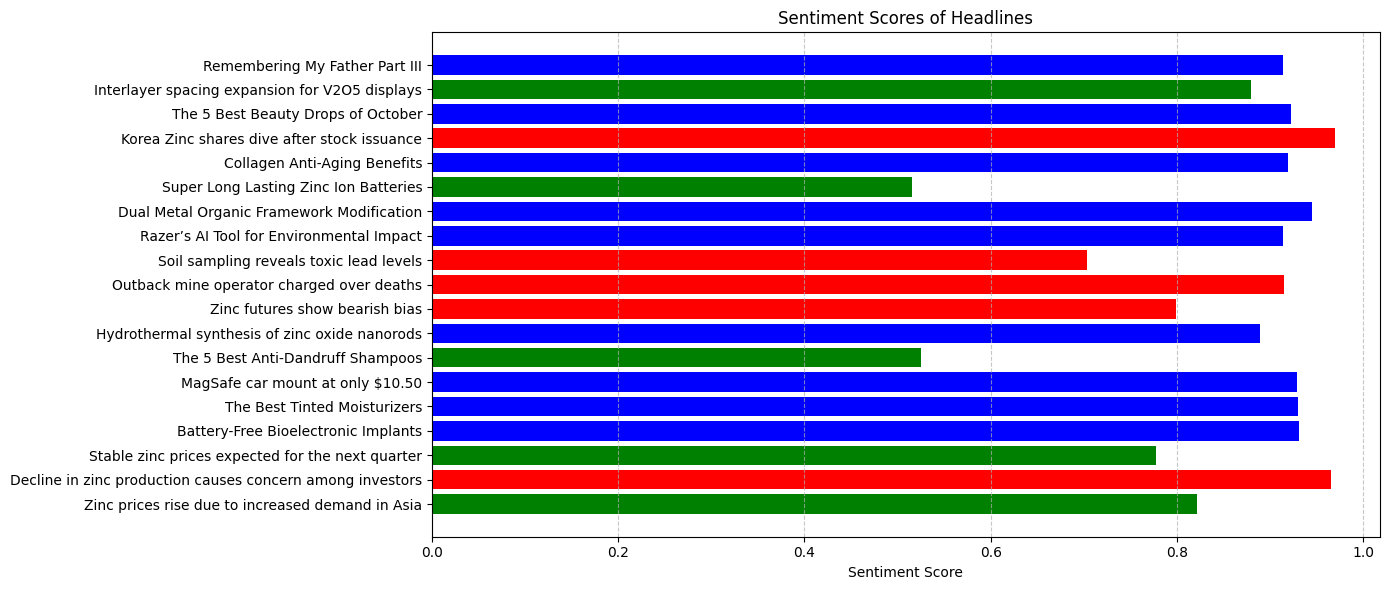

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the headlines and sentiment scores
data = {
    'Headline': [
        'Zinc prices rise due to increased demand in Asia',
        'Decline in zinc production causes concern among investors',
        'Stable zinc prices expected for the next quarter',
        'Battery-Free Bioelectronic Implants',
        'The Best Tinted Moisturizers',
        'MagSafe car mount at only $10.50',
        'The 5 Best Anti-Dandruff Shampoos',
        'Hydrothermal synthesis of zinc oxide nanorods',
        'Zinc futures show bearish bias',
        'Outback mine operator charged over deaths',
        'Soil sampling reveals toxic lead levels',
        'Razer’s AI Tool for Environmental Impact',
        'Dual Metal Organic Framework Modification',
        'Super Long Lasting Zinc Ion Batteries',
        'Collagen Anti-Aging Benefits',
        'Korea Zinc shares dive after stock issuance',
        'The 5 Best Beauty Drops of October',
        'Interlayer spacing expansion for V2O5 displays'
    ],
    'Sentiment Score': [
        0.8219, 0.9652, 0.7775, 0.9314, 0.9299, 0.9292,
        0.5252, 0.8886, 0.7985, 0.9151, 0.7028, 0.9136,
        0.9450, 0.5152, 0.9195, 0.9694, 0.9225, 0.8795, 0.9134
    ],
    'Sentiment': [
        'positive', 'negative', 'positive', 'neutral', 'neutral', 'neutral',
        'positive', 'neutral', 'negative', 'negative', 'negative', 'neutral',
        'neutral', 'positive', 'neutral', 'negative', 'neutral', 'positive', 'neutral'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the sentiment scores
plt.figure(figsize=(14, 6))
plt.barh(df['Headline'], df['Sentiment Score'], color=df['Sentiment'].map({'positive': 'green', 'negative': 'red', 'neutral': 'blue'}))
plt.xlabel('Sentiment Score')
plt.title('Sentiment Scores of Headlines')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout for readability
plt.show()


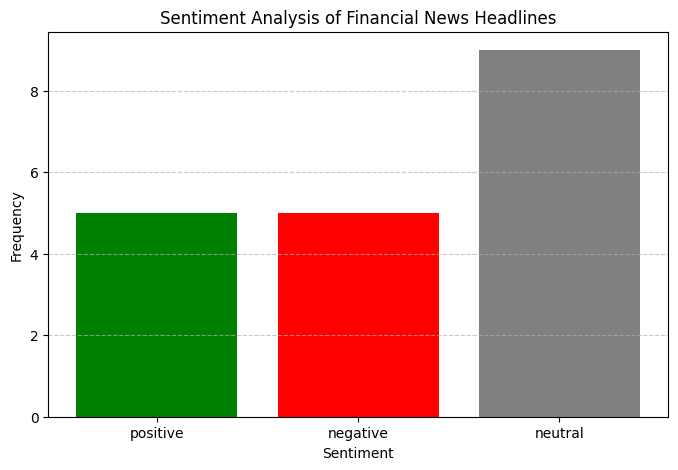

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Replace with your actual list of sentiments
sentiments = [
    'positive', 'negative', 'positive', 'neutral', 'neutral',
    'neutral', 'positive', 'neutral', 'negative', 'negative',
    'negative', 'neutral', 'neutral', 'positive', 'neutral',
    'negative', 'neutral', 'positive', 'neutral'
]

# Count occurrences of each sentiment
sentiment_counts = Counter(sentiments)

# Extract sentiment types and counts
labels = sentiment_counts.keys()
values = sentiment_counts.values()

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'red', 'gray'])

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Financial News Headlines')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
sentiment_data = {
    "Date": ["2024-11-01", "2024-11-02", "2024-11-03"],  # Example dates
    "Sentiment": ["Positive", "Negative", "Neutral"]
}
sentiment_df = pd.DataFrame(sentiment_data)


In [ ]:
# Ensure 'Date' columns are in datetime format
zinc_data['Date'] = pd.to_datetime(zinc_data['Date'])
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

# Merge the datasets on the 'Date' column
merged_data = pd.merge(zinc_data, sentiment_df, on='Date', how='inner')


In [ ]:
print(zinc_data.head())
print(sentiment_df.head())

# Check for missing data
print(zinc_data.isnull().sum())
print(sentiment_df.isnull().sum())


         date     price    open    high     low    vol. change_%       Date  \
0  2014-01-01  0.121367  127.35  128.00  127.00   1.70K   -1.28% 2014-01-01   
1  2014-01-02  0.130168  128.60  131.05  128.60  11.77K    1.69% 2014-01-02   
2  2014-01-03  0.119116  129.25  129.25  126.80   7.66K   -2.08% 2014-01-03   
3  2014-01-04  0.119116  126.95  126.95  126.95   7.52K    0.00% 2014-01-04   
4  2014-01-06  0.122391  127.40  127.85  125.90   7.52K    0.63% 2014-01-06   

   Year  Month  Day  7-Day_MA  30-Day_MA  Daily_Return  30-Day MA  
0  2014      1    1       NaN        NaN           NaN        NaN  
1  2014      1    2       NaN        NaN      0.016863        NaN  
2  2014      1    3       NaN        NaN     -0.020825        NaN  
3  2014      1    4       NaN        NaN      0.000000        NaN  
4  2014      1    6       NaN        NaN      0.006302        NaN  
        Date Sentiment
0 2024-11-01  Positive
1 2024-11-02  Negative
2 2024-11-03   Neutral
date             0
price 

In [ ]:
# Checking common dates between the two datasets
common_dates = pd.merge(zinc_data[['Date']], sentiment_df[['Date']], on='Date', how='inner')
print(common_dates.head())

# Now perform the merge on common dates
merged_data = pd.merge(zinc_data, sentiment_df, on='Date', how='inner')


Empty DataFrame
Columns: [Date]
Index: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Try a different ticker or another API like Quandl
# This is an example; replace with a valid ticker symbol
zinc_data = yf.download("ZINC", start="2010-01-01", end="2023-01-01")
zinc_data['Date'] = zinc_data.index  # Make sure 'Date' is a column

# Check data
print(zinc_data.head())


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZINC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2010-01-01 -> 2023-01-01)')


Empty DataFrame
Columns: [(Adj Close, ZINC), (Close, ZINC), (High, ZINC), (Low, ZINC), (Open, ZINC), (Volume, ZINC), (Date, )]
Index: []


<ipython-input-53-234463386af4>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start="2010-01-01", periods=100, freq='M'),


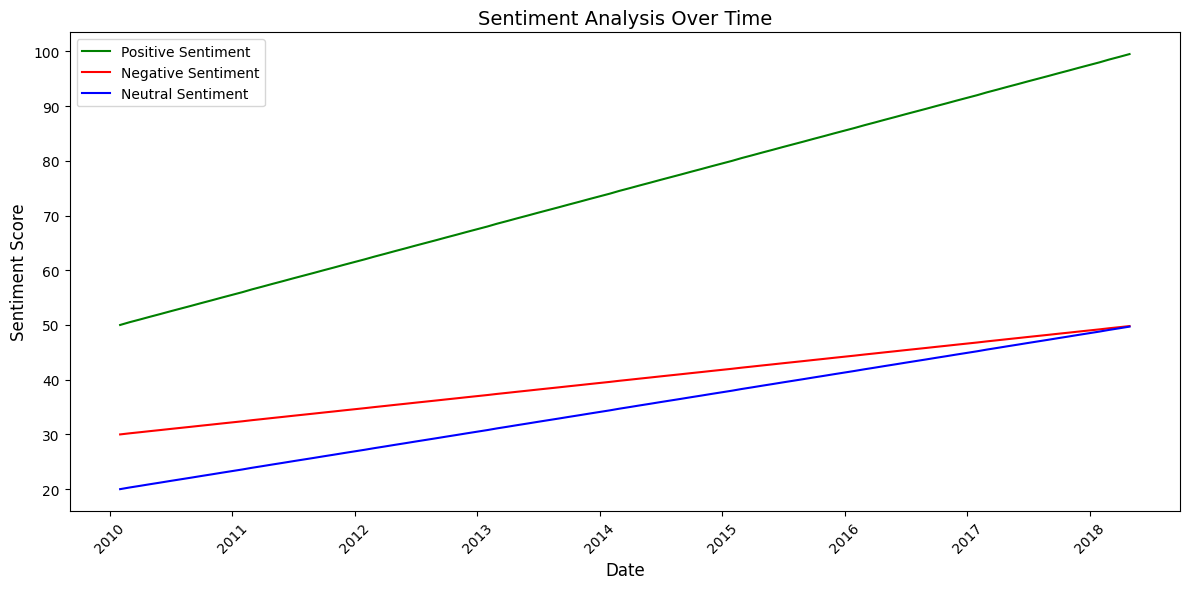

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example sentiment data (replace with actual sentiment analysis data)
sentiment_data = {
    'Date': pd.date_range(start="2010-01-01", periods=100, freq='M'),
    'Positive': [50 + i*0.5 for i in range(100)],  # Simulated positive sentiment
    'Negative': [30 + i*0.2 for i in range(100)],  # Simulated negative sentiment
    'Neutral': [20 + i*0.3 for i in range(100)]   # Simulated neutral sentiment
}

# Convert the sentiment data into a pandas DataFrame
sentiment_df = pd.DataFrame(sentiment_data)

# Plot the sentiment data
plt.figure(figsize=(12, 6))
plt.plot(sentiment_df['Date'], sentiment_df['Positive'], label='Positive Sentiment', color='green')
plt.plot(sentiment_df['Date'], sentiment_df['Negative'], label='Negative Sentiment', color='red')
plt.plot(sentiment_df['Date'], sentiment_df['Neutral'], label='Neutral Sentiment', color='blue')

# Customize the plot
plt.title('Sentiment Analysis Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


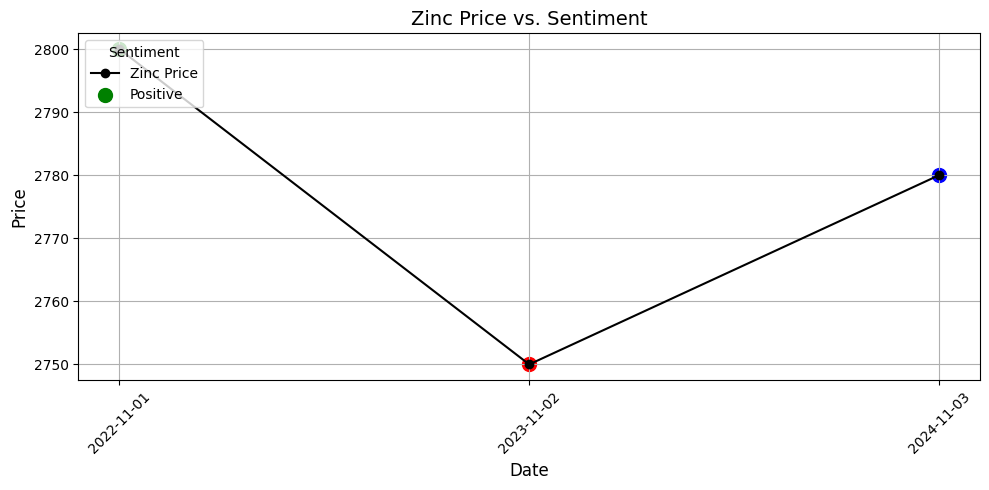

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Date": ["2022-11-01", "2023-11-02", "2024-11-03",],
    "Sentiment": ["Positive", "Negative", "Neutral"],
    "Price": [2800, 2750, 2780],
}

df = pd.DataFrame(data)

# Map sentiment to colors for visualization
sentiment_color_map = {
    "Positive": "green",
    "Negative": "red",
    "Neutral": "blue"
}

# Plot sentiment vs. price
plt.figure(figsize=(10, 5))

# Plot zinc price data
plt.plot(df["Date"], df["Price"], label="Zinc Price", marker="o", linestyle='-', color="black")

# Plot sentiment data as colored points
for i in range(len(df)):
    plt.scatter(df["Date"][i], df["Price"][i], color=sentiment_color_map[df["Sentiment"][i]], label=df["Sentiment"][i] if i == 0 else "", s=100)

# Set the title and labels
plt.title("Zinc Price vs. Sentiment", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Add a legend for better understanding
plt.legend(title="Sentiment", loc="upper left")

# Display grid and show the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): 1.4407436131386753
Mean Squared Error (MSE): 3.7997059146896914
R-squared (R²): 0.9952669473201629


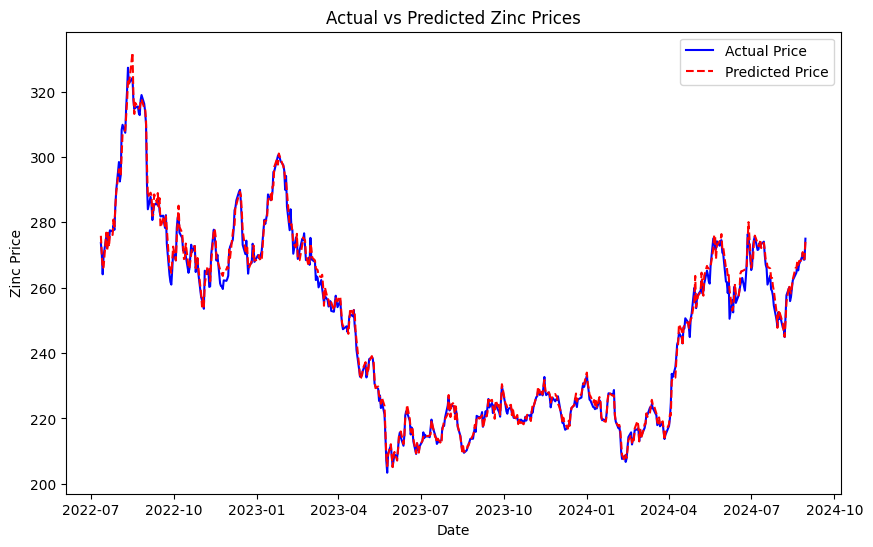

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
zinc_data = pd.read_csv('Zinc Historical Data.csv')

# Step 2: Data preprocessing
zinc_data['Date'] = pd.to_datetime(zinc_data['Date'], dayfirst=True)
zinc_data.sort_values(by='Date', inplace=True)
zinc_data.set_index('Date', inplace=True)

# Ensure no missing values
zinc_data = zinc_data.dropna()

# Step 3: Feature selection
# Use lag features for predicting present price
zinc_data['Previous Price'] = zinc_data['Price'].shift(1)
zinc_data.dropna(inplace=True)

# Define features (X) and target (y)
X = zinc_data[['Previous Price', 'Open', 'High', 'Low']]
y = zinc_data['Price']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Step 5: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict current prices
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Step 8: Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Zinc Price')
plt.title('Actual vs Predicted Zinc Prices')
plt.legend()
plt.show()


        Date  Actual Price  Predicted Price
0 2022-07-12        273.65         275.8790
1 2022-07-13        270.30         270.2840
2 2022-07-14        264.10         265.8480
3 2022-07-15        269.75         266.3175
4 2022-07-18        275.70         276.8300
5 2022-07-19        272.35         271.3105
6 2022-07-20        276.80         276.7540
7 2022-07-21        274.40         272.5935
8 2022-07-22        277.55         276.2675
9 2022-07-25        277.20         276.1445

Mean Absolute Error (MAE): 1.4407436131386753
Mean Squared Error (MSE): 3.7997059146896914
R-squared (R²): 0.9952669473201629


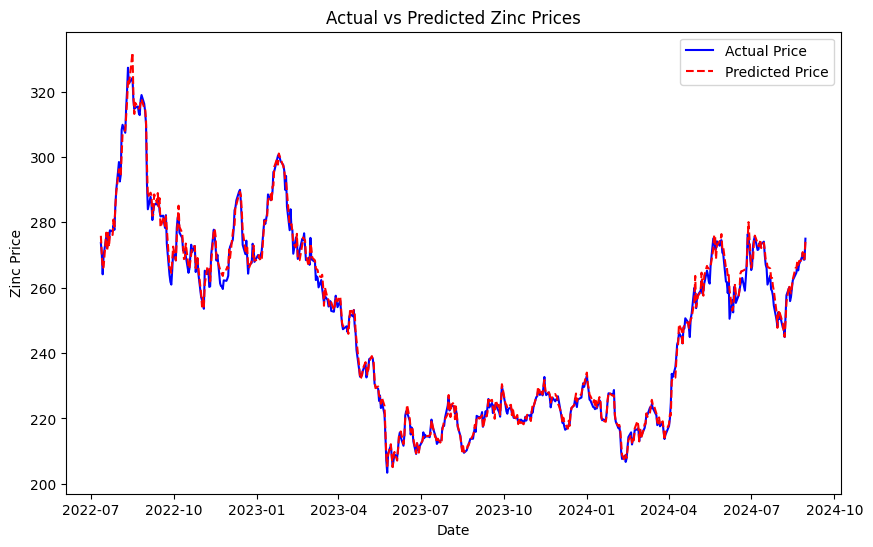

In [ ]:
# After predictions
y_pred = model.predict(X_test)

# Create a DataFrame to display actual and predicted prices
comparison_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Display the DataFrame with actual vs predicted prices
print(comparison_df.head(10))  # Show the first 10 rows for preview

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Zinc Price')
plt.title('Actual vs Predicted Zinc Prices')
plt.legend()
plt.show()
